<a href="https://colab.research.google.com/github/yakaralar/IE492/blob/master/bitirme_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import glob
import shutil
os.listdir()

['.config', 'drive', 'sample_data']

In [0]:
os.listdir("drive/My Drive/colab_datas/IE 492")

['Comparison of methods.pdf',
 '1-s2.0-S1364032114000914-main.pdf',
 '1-s2.0-S0360544209002539-main.pdf',
 '1-s2.0-S1876610211043116-main.pdf',
 '1-s2.0-S0305048311001423-main.pdf',
 'weather_turkey_processed.zip',
 'Meta_L_makaleler',
 'all_data.feather',
 'UECM-15012015-20022020.csv',
 'RealTimeConsumption-01122014-09032020.csv']

In [0]:
shutil.copy("drive/My Drive/colab_datas/IE 492/weather_turkey_processed.zip","./")
!unzip weather_turkey_processed.zip

In [0]:
shutil.copy("drive/My Drive/colab_datas/IE 492/UECM-15012015-20022020.csv","./")
shutil.copy("drive/My Drive/colab_datas/IE 492/RealTimeConsumption-01122014-09032020.csv","./")
shutil.copy("drive/My Drive/colab_datas/IE 492/all_data.feather","./")

'./all_data.feather'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
from tqdm import tqdm_notebook as tqdm

In [0]:
weather_paths=glob.glob("weather_turkey_processed/*.csv")
np.random.choice(weather_paths,10)

array(['weather_turkey_processed/38.5_39.csv',
       'weather_turkey_processed/38.5_39.csv',
       'weather_turkey_processed/38.5_39.csv',
       'weather_turkey_processed/38_36.csv',
       'weather_turkey_processed/37_34.5.csv',
       'weather_turkey_processed/37_32.5.csv',
       'weather_turkey_processed/39.5_34.5.csv',
       'weather_turkey_processed/39.5_29.5.csv',
       'weather_turkey_processed/42_33.csv',
       'weather_turkey_processed/36_36.5.csv'], dtype='<U38')

In [0]:
# weather_turkey=pd.DataFrame()
# for path in tqdm(weather_paths):
#     df=pd.read_csv(path)
#     weather_turkey=pd.concat([weather_turkey,df]).reset_index(drop=True)
# weather_turkey

In [0]:
# weather_turkey.to_feather("drive/My Drive/colab_datas/IE 492/all_data.feather") 

# Energy consumption

In [0]:
# bruuuuuuuh
consumption_df=pd.read_csv("RealTimeConsumption-01122014-09032020.csv",encoding='latin-1')
consumption_df.columns=["Date","Hour","Consumption"]
consumption_df["Datetime"]=consumption_df["Date"]+" "+consumption_df["Hour"]
consumption_df["Consumption"]=consumption_df["Consumption"].apply(lambda x:x.replace(",","")).astype(float)
consumption_df["Datetime"]=pd.to_datetime(consumption_df["Datetime"])
consumption_df

,Date,Hour,Consumption,Datetime
0,31.12.2015,00:00,29590.88,2015-12-31 00:00:00
1,31.12.2015,01:00,27785.43,2015-12-31 01:00:00
2,31.12.2015,02:00,26516.53,2015-12-31 02:00:00
3,31.12.2015,03:00,26091.62,2015-12-31 03:00:00
4,31.12.2015,04:00,25871.54,2015-12-31 04:00:00
...,...,...,...,...
36715,09.03.2020,19:00,0.00,2020-09-03 19:00:00
36716,09.03.2020,20:00,0.00,2020-09-03 20:00:00
36717,09.03.2020,21:00,0.00,2020-09-03 21:00:00
36718,09.03.2020,22:00,0.00,2020-09-03 22:00:00


In [0]:
## bruuuuuuuh
#consumption_df=pd.read_csv("UECM-15012015-20022020.csv",encoding='latin-1')
#consumption_df.columns=["Date","Hour","Consumption"]
#consumption_df["Datetime"]=consumption_df["Date"]+" "+consumption_df["Hour"]
#consumption_df["Datetime"]=pd.to_datetime(consumption_df["Datetime"])
#consumption_df.Consumption=consumption_df.Consumption.apply(lambda x: x.replace(".","").replace(",",".")).astype(float)
#consumption_df

In [0]:
consumption_df=consumption_df.loc[consumption_df["Datetime"]<pd.to_datetime("2020-03-01 00:00:00")]
consumption_df

,Date,Hour,Consumption,Datetime
0,31.12.2015,00:00,29590.88,2015-12-31 00:00:00
1,31.12.2015,01:00,27785.43,2015-12-31 01:00:00
2,31.12.2015,02:00,26516.53,2015-12-31 02:00:00
3,31.12.2015,03:00,26091.62,2015-12-31 03:00:00
4,31.12.2015,04:00,25871.54,2015-12-31 04:00:00
...,...,...,...,...
36547,02.03.2020,19:00,38486.43,2020-02-03 19:00:00
36548,02.03.2020,20:00,38103.82,2020-02-03 20:00:00
36549,02.03.2020,21:00,37056.92,2020-02-03 21:00:00
36550,02.03.2020,22:00,35678.38,2020-02-03 22:00:00


# Weather related features

pivotalyıp kaydet sonradan birleştirerek oku

### all data pivot

In [0]:
all_data=pd.read_feather("all_data.feather")
all_data

,model_type,model_epoch,forecast_epoch,lon,lat,ACPCP_surface,ALBDO_surface,APCP_surface,CFRZR_surface,CICEP_surface,CPRAT_surface,CRAIN_surface,CSNOW_surface,DLWRF_surface,DPT_2.m.above.ground,DSWRF_surface,GUST_surface,ICEC_surface,PRATE_surface,PRES_80.m.above.ground,PRES_surface,PRMSL_mean.sea.level,PWAT_entire.atmosphere..considered.as.a.single.layer.,RH_2.m.above.ground,RH_entire.atmosphere..considered.as.a.single.layer.,SNOD_surface,SUNSD_surface,TCDC_boundary.layer.cloud.layer,TCDC_convective.cloud.layer,TCDC_entire.atmosphere,TCDC_high.cloud.layer,TCDC_low.cloud.layer,TCDC_middle.cloud.layer,TMP_2.m.above.ground,TMP_80.m.above.ground,TMP_surface,UGRD_10.m.above.ground,UGRD_80.m.above.ground,UGRD_planetary.boundary.layer,USWRF_surface,USWRF_top.of.atmosphere,VGRD_10.m.above.ground,VGRD_80.m.above.ground,VGRD_planetary.boundary.layer,VIS_surface
0,gfs-025,1421280000,1421290800,35.0,36.5,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,311.0,277.200,0.0,7.20000,0.0,0.0,100666.0,101631.0,101828.0,14.1,52.0,39.0,NaN,0.0,0.0,0.0,98.0,98.0,63.0,68.0,286.900,285.4,292.300,-3.750000,-4.480000,-5.000000,0.0,0.0,-5.94000,-6.07000,-5.30000,NaN
1,gfs-025,1421280000,1421301600,35.0,36.5,0.000,7.8,0.000,0.0,0.0,0.0,0.0,0.0,307.0,276.700,10.0,5.80000,0.0,0.0,100685.0,101650.0,101829.0,14.3,50.9,40.0,NaN,3600.0,0.0,0.0,97.0,97.0,35.0,73.0,286.580,285.1,292.300,-3.490000,-3.830000,-4.100000,1.0,10.0,-4.82000,-5.04000,-4.60000,NaN
2,gfs-025,1421301600,1421312400,35.0,36.5,0.000,8.1,0.000,0.0,0.0,0.0,0.0,0.0,291.0,276.500,340.0,4.80000,0.0,0.0,100580.0,101545.0,101720.0,14.2,49.1,38.0,NaN,10800.0,0.0,0.0,42.0,29.0,1.0,40.0,286.920,285.5,292.300,-4.430000,-4.220000,-4.000000,28.0,104.0,-2.56000,-2.66000,-2.20000,NaN
3,gfs-025,1421301600,1421323200,35.0,36.5,0.000,7.2,0.000,0.0,0.0,0.0,0.0,0.0,303.0,276.200,370.0,3.20000,0.0,0.0,100529.0,101490.0,101698.0,15.1,47.2,38.0,NaN,21600.0,0.0,0.0,55.0,36.0,11.0,46.0,287.240,286.0,292.300,-3.170000,-3.260000,-3.000000,26.0,139.0,-0.17000,-0.20000,-0.60000,NaN
4,gfs-025,1421323200,1421334000,35.0,36.5,0.000,6.6,0.000,0.0,0.0,0.0,0.0,0.0,315.0,276.800,100.0,2.90000,0.0,0.0,100558.0,101520.0,101759.0,14.6,50.1,37.0,NaN,9900.0,0.0,0.0,100.0,100.0,11.0,18.0,286.940,285.7,292.300,-3.560000,-3.540000,-2.800000,7.0,124.0,0.12000,-0.14000,-0.40000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10813798,gfs-025,1582156800,1582574400,26.0,36.5,7.375,0.0,7.875,0.0,0.0,0.0,0.0,0.0,300.4,283.307,0.0,8.62194,0.0,0.0,100903.0,101860.0,101896.0,14.7,68.4,24.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289.053,288.1,290.000,-0.806777,-0.913093,-0.876044,0.0,0.0,-6.95972,-7.66998,-8.33064,24135.0
10813799,gfs-025,1582156800,1582578000,26.0,36.5,7.375,0.0,7.875,0.0,0.0,0.0,0.0,0.0,300.0,282.907,0.0,9.40281,0.0,0.0,100961.0,101918.0,101930.0,15.0,67.5,24.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288.867,287.9,290.004,0.423198,0.435540,0.180768,0.0,0.0,-8.46032,-9.34240,-9.73074,24135.0
10813800,gfs-025,1582156800,1582581600,26.0,36.5,7.375,0.0,7.875,0.0,0.0,0.0,0.0,0.0,299.0,282.928,0.0,8.71604,0.0,0.0,100974.0,101933.0,101942.0,15.7,68.1,26.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288.746,287.8,289.900,-0.191531,-0.269224,-0.511884,0.0,0.0,-7.99818,-8.79907,-9.04956,24134.9
10813801,gfs-025,1582156800,1582585200,26.0,36.5,7.375,0.0,7.875,0.0,0.0,0.0,0.0,0.0,299.0,282.827,0.0,8.72012,0.0,0.0,101005.0,101964.0,101961.0,15.4,67.5,26.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288.733,287.8,289.917,0.076135,-0.003641,-0.868927,0.0,0.0,-7.48593,-8.24022,-9.08133,24134.9


In [0]:
# lat_lon=pd.DataFrame([i.strip(".csv").split("/")[-1].split("_") for i in weather_paths],columns=["lon","lat"]).astype(float).sort_values(by=["lon","lat"]).reset_index(drop=True)
# lat_lon

In [0]:
# all_data["forecast_epoch"]=pd.to_datetime(all_data["forecast_epoch"],unit="s")
# all_data=all_data.sort_values(by=["forecast_epoch"])
# all_data

In [0]:
all_data["CICEP_surface"].value_counts()

0.0    10811721
1.0          54
Name: CICEP_surface, dtype: int64

In [0]:
all_data=all_data.drop(columns=["model_type","model_epoch","CFRZR_surface","CICEP_surface","ICEC_surface","SNOD_surface"])
all_data

,forecast_epoch,lon,lat,ACPCP_surface,ALBDO_surface,APCP_surface,CPRAT_surface,CRAIN_surface,CSNOW_surface,DLWRF_surface,DPT_2.m.above.ground,DSWRF_surface,GUST_surface,PRATE_surface,PRES_80.m.above.ground,PRES_surface,PRMSL_mean.sea.level,PWAT_entire.atmosphere..considered.as.a.single.layer.,RH_2.m.above.ground,RH_entire.atmosphere..considered.as.a.single.layer.,SUNSD_surface,TCDC_boundary.layer.cloud.layer,TCDC_convective.cloud.layer,TCDC_entire.atmosphere,TCDC_high.cloud.layer,TCDC_low.cloud.layer,TCDC_middle.cloud.layer,TMP_2.m.above.ground,TMP_80.m.above.ground,TMP_surface,UGRD_10.m.above.ground,UGRD_80.m.above.ground,UGRD_planetary.boundary.layer,USWRF_surface,USWRF_top.of.atmosphere,VGRD_10.m.above.ground,VGRD_80.m.above.ground,VGRD_planetary.boundary.layer,VIS_surface
0,1421290800,35.0,36.5,0.000,0.0,0.000,0.0,0.0,0.0,311.0,277.200,0.0,7.20000,0.0,100666.0,101631.0,101828.0,14.1,52.0,39.0,0.0,0.0,0.0,98.0,98.0,63.0,68.0,286.900,285.4,292.300,-3.750000,-4.480000,-5.000000,0.0,0.0,-5.94000,-6.07000,-5.30000,NaN
1,1421301600,35.0,36.5,0.000,7.8,0.000,0.0,0.0,0.0,307.0,276.700,10.0,5.80000,0.0,100685.0,101650.0,101829.0,14.3,50.9,40.0,3600.0,0.0,0.0,97.0,97.0,35.0,73.0,286.580,285.1,292.300,-3.490000,-3.830000,-4.100000,1.0,10.0,-4.82000,-5.04000,-4.60000,NaN
2,1421312400,35.0,36.5,0.000,8.1,0.000,0.0,0.0,0.0,291.0,276.500,340.0,4.80000,0.0,100580.0,101545.0,101720.0,14.2,49.1,38.0,10800.0,0.0,0.0,42.0,29.0,1.0,40.0,286.920,285.5,292.300,-4.430000,-4.220000,-4.000000,28.0,104.0,-2.56000,-2.66000,-2.20000,NaN
3,1421323200,35.0,36.5,0.000,7.2,0.000,0.0,0.0,0.0,303.0,276.200,370.0,3.20000,0.0,100529.0,101490.0,101698.0,15.1,47.2,38.0,21600.0,0.0,0.0,55.0,36.0,11.0,46.0,287.240,286.0,292.300,-3.170000,-3.260000,-3.000000,26.0,139.0,-0.17000,-0.20000,-0.60000,NaN
4,1421334000,35.0,36.5,0.000,6.6,0.000,0.0,0.0,0.0,315.0,276.800,100.0,2.90000,0.0,100558.0,101520.0,101759.0,14.6,50.1,37.0,9900.0,0.0,0.0,100.0,100.0,11.0,18.0,286.940,285.7,292.300,-3.560000,-3.540000,-2.800000,7.0,124.0,0.12000,-0.14000,-0.40000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10813798,1582574400,26.0,36.5,7.375,0.0,7.875,0.0,0.0,0.0,300.4,283.307,0.0,8.62194,0.0,100903.0,101860.0,101896.0,14.7,68.4,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289.053,288.1,290.000,-0.806777,-0.913093,-0.876044,0.0,0.0,-6.95972,-7.66998,-8.33064,24135.0
10813799,1582578000,26.0,36.5,7.375,0.0,7.875,0.0,0.0,0.0,300.0,282.907,0.0,9.40281,0.0,100961.0,101918.0,101930.0,15.0,67.5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288.867,287.9,290.004,0.423198,0.435540,0.180768,0.0,0.0,-8.46032,-9.34240,-9.73074,24135.0
10813800,1582581600,26.0,36.5,7.375,0.0,7.875,0.0,0.0,0.0,299.0,282.928,0.0,8.71604,0.0,100974.0,101933.0,101942.0,15.7,68.1,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288.746,287.8,289.900,-0.191531,-0.269224,-0.511884,0.0,0.0,-7.99818,-8.79907,-9.04956,24134.9
10813801,1582585200,26.0,36.5,7.375,0.0,7.875,0.0,0.0,0.0,299.0,282.827,0.0,8.72012,0.0,101005.0,101964.0,101961.0,15.4,67.5,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288.733,287.8,289.917,0.076135,-0.003641,-0.868927,0.0,0.0,-7.48593,-8.24022,-9.08133,24134.9


In [0]:
# If sıkıntı cıkarsa
lat_lon_dict={"Istanbul":(41,29),
"Ankara":(40,33),
"Izmir":(38,27),
"Bursa":(40,29),
"Antalya":(37,30),
"Konya": (38,32)}
lat_lon_dict.values()

dict_values([(41, 29), (40, 33), (38, 27), (40, 29), (37, 30), (38, 32)])

In [0]:
lats_=np.array(list(lat_lon_dict.values()))[:,0]
long_=np.array(list(lat_lon_dict.values()))[:,1]

all_data=all_data.loc[(all_data["lat"].isin(lats_))]

In [0]:
all_data=all_data.loc[(all_data["lon"].isin(long_))]

In [0]:
weather_forecast_data=pd.pivot_table(all_data,index="forecast_epoch",columns=["lon","lat"])
weather_forecast_data.columns=['_'.join(list(map(str,i))) for i in weather_forecast_data.columns]

In [0]:
weather_forecast_data

,ACPCP_surface_27.0_37.0,ACPCP_surface_27.0_38.0,ACPCP_surface_27.0_40.0,ACPCP_surface_27.0_41.0,ACPCP_surface_29.0_37.0,ACPCP_surface_29.0_38.0,ACPCP_surface_29.0_40.0,ACPCP_surface_29.0_41.0,ACPCP_surface_30.0_37.0,ACPCP_surface_30.0_38.0,ACPCP_surface_30.0_40.0,ACPCP_surface_30.0_41.0,ACPCP_surface_32.0_37.0,ACPCP_surface_32.0_38.0,ACPCP_surface_32.0_40.0,ACPCP_surface_32.0_41.0,ACPCP_surface_33.0_37.0,ACPCP_surface_33.0_38.0,ACPCP_surface_33.0_40.0,ACPCP_surface_33.0_41.0,ALBDO_surface_27.0_37.0,ALBDO_surface_27.0_38.0,ALBDO_surface_27.0_40.0,ALBDO_surface_27.0_41.0,ALBDO_surface_29.0_37.0,ALBDO_surface_29.0_38.0,ALBDO_surface_29.0_40.0,ALBDO_surface_29.0_41.0,ALBDO_surface_30.0_37.0,ALBDO_surface_30.0_38.0,ALBDO_surface_30.0_40.0,ALBDO_surface_30.0_41.0,ALBDO_surface_32.0_37.0,ALBDO_surface_32.0_38.0,ALBDO_surface_32.0_40.0,ALBDO_surface_32.0_41.0,ALBDO_surface_33.0_37.0,ALBDO_surface_33.0_38.0,ALBDO_surface_33.0_40.0,ALBDO_surface_33.0_41.0,...,VGRD_planetary.boundary.layer_27.0_37.0,VGRD_planetary.boundary.layer_27.0_38.0,VGRD_planetary.boundary.layer_27.0_40.0,VGRD_planetary.boundary.layer_27.0_41.0,VGRD_planetary.boundary.layer_29.0_37.0,VGRD_planetary.boundary.layer_29.0_38.0,VGRD_planetary.boundary.layer_29.0_40.0,VGRD_planetary.boundary.layer_29.0_41.0,VGRD_planetary.boundary.layer_30.0_37.0,VGRD_planetary.boundary.layer_30.0_38.0,VGRD_planetary.boundary.layer_30.0_40.0,VGRD_planetary.boundary.layer_30.0_41.0,VGRD_planetary.boundary.layer_32.0_37.0,VGRD_planetary.boundary.layer_32.0_38.0,VGRD_planetary.boundary.layer_32.0_40.0,VGRD_planetary.boundary.layer_32.0_41.0,VGRD_planetary.boundary.layer_33.0_37.0,VGRD_planetary.boundary.layer_33.0_38.0,VGRD_planetary.boundary.layer_33.0_40.0,VGRD_planetary.boundary.layer_33.0_41.0,VIS_surface_27.0_37.0,VIS_surface_27.0_38.0,VIS_surface_27.0_40.0,VIS_surface_27.0_41.0,VIS_surface_29.0_37.0,VIS_surface_29.0_38.0,VIS_surface_29.0_40.0,VIS_surface_29.0_41.0,VIS_surface_30.0_37.0,VIS_surface_30.0_38.0,VIS_surface_30.0_40.0,VIS_surface_30.0_41.0,VIS_surface_32.0_37.0,VIS_surface_32.0_38.0,VIS_surface_32.0_40.0,VIS_surface_32.0_41.0,VIS_surface_33.0_37.0,VIS_surface_33.0_38.0,VIS_surface_33.0_40.0,VIS_surface_33.0_41.0
forecast_epoch,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1421290800,4.530,0.0300,0.000,0.0000,0.00,0.0,0.00,0.0000,0.0,0.0,0.000,0.000,0.09,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.80000,0.80000,2.800000,2.700000,0.00000,1.40000,3.00000,4.500000,0.50000,1.10000,3.900000,3.600000,0.00000,1.50000,-0.20000,3.60000,2.60000,1.9000,0.8000,3.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421301600,7.600,0.0400,0.000,0.0000,0.00,0.0,0.00,0.0000,0.0,0.0,0.000,0.000,0.13,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.5,7.3,21.0,26.5,26.1,28.4,37.4,9.0,51.5,60.5,52.4,17.5,60.8,72.0,33.2,63.0,36.8,73.5,37.4,54.5,...,0.80000,0.40000,2.300000,1.500000,-0.20000,1.30000,2.70000,4.100000,0.90000,1.00000,3.500000,3.400000,-1.20000,0.70000,0.30000,3.60000,1.90000,1.6000,1.1000,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421312400,0.550,0.0200,0.000,0.0000,0.00,0.0,0.00,0.0000,0.0,0.0,0.000,0.000,0.03,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.5,8.4,22.3,27.3,25.7,29.7,35.9,9.2,51.2,59.4,51.2,16.3,61.0,72.3,31.0,62.8,39.1,71.7,34.7,54.5,...,0.50000,0.70000,1.900000,0.300000,1.90000,1.20000,1.80000,4.000000,1.10000,1.50000,2.600000,3.400000,-0.50000,1.20000,0.20000,3.30000,0.30000,1.8000,1.1000,2.60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421323200,0.580,0.0200,0.000,0.0000,0.00,0.0,0.00,0.0000,0.0,0.0,0.000,0.000,0.04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.9,7.1,19.7,25.0,24.6,29.3,34.3,8.0,49.3,56.0,49.5,16.1,60.7,72.2,27.9,62.0,37.7,70.6,31.3,53.0,...,0.90000,-0.30000,-0.200000,-1.200000,2.10000,0.3000

In [0]:
weather_forecast_data=weather_forecast_data.reset_index()
weather_forecast_data["forecast_epoch"]=pd.to_datetime(weather_forecast_data["forecast_epoch"],unit="s")
weather_forecast_data

,forecast_epoch,ACPCP_surface_27.0_37.0,ACPCP_surface_27.0_38.0,ACPCP_surface_27.0_40.0,ACPCP_surface_27.0_41.0,ACPCP_surface_29.0_37.0,ACPCP_surface_29.0_38.0,ACPCP_surface_29.0_40.0,ACPCP_surface_29.0_41.0,ACPCP_surface_30.0_37.0,ACPCP_surface_30.0_38.0,ACPCP_surface_30.0_40.0,ACPCP_surface_30.0_41.0,ACPCP_surface_32.0_37.0,ACPCP_surface_32.0_38.0,ACPCP_surface_32.0_40.0,ACPCP_surface_32.0_41.0,ACPCP_surface_33.0_37.0,ACPCP_surface_33.0_38.0,ACPCP_surface_33.0_40.0,ACPCP_surface_33.0_41.0,ALBDO_surface_27.0_37.0,ALBDO_surface_27.0_38.0,ALBDO_surface_27.0_40.0,ALBDO_surface_27.0_41.0,ALBDO_surface_29.0_37.0,ALBDO_surface_29.0_38.0,ALBDO_surface_29.0_40.0,ALBDO_surface_29.0_41.0,ALBDO_surface_30.0_37.0,ALBDO_surface_30.0_38.0,ALBDO_surface_30.0_40.0,ALBDO_surface_30.0_41.0,ALBDO_surface_32.0_37.0,ALBDO_surface_32.0_38.0,ALBDO_surface_32.0_40.0,ALBDO_surface_32.0_41.0,ALBDO_surface_33.0_37.0,ALBDO_surface_33.0_38.0,ALBDO_surface_33.0_40.0,...,VGRD_planetary.boundary.layer_27.0_37.0,VGRD_planetary.boundary.layer_27.0_38.0,VGRD_planetary.boundary.layer_27.0_40.0,VGRD_planetary.boundary.layer_27.0_41.0,VGRD_planetary.boundary.layer_29.0_37.0,VGRD_planetary.boundary.layer_29.0_38.0,VGRD_planetary.boundary.layer_29.0_40.0,VGRD_planetary.boundary.layer_29.0_41.0,VGRD_planetary.boundary.layer_30.0_37.0,VGRD_planetary.boundary.layer_30.0_38.0,VGRD_planetary.boundary.layer_30.0_40.0,VGRD_planetary.boundary.layer_30.0_41.0,VGRD_planetary.boundary.layer_32.0_37.0,VGRD_planetary.boundary.layer_32.0_38.0,VGRD_planetary.boundary.layer_32.0_40.0,VGRD_planetary.boundary.layer_32.0_41.0,VGRD_planetary.boundary.layer_33.0_37.0,VGRD_planetary.boundary.layer_33.0_38.0,VGRD_planetary.boundary.layer_33.0_40.0,VGRD_planetary.boundary.layer_33.0_41.0,VIS_surface_27.0_37.0,VIS_surface_27.0_38.0,VIS_surface_27.0_40.0,VIS_surface_27.0_41.0,VIS_surface_29.0_37.0,VIS_surface_29.0_38.0,VIS_surface_29.0_40.0,VIS_surface_29.0_41.0,VIS_surface_30.0_37.0,VIS_surface_30.0_38.0,VIS_surface_30.0_40.0,VIS_surface_30.0_41.0,VIS_surface_32.0_37.0,VIS_surface_32.0_38.0,VIS_surface_32.0_40.0,VIS_surface_32.0_41.0,VIS_surface_33.0_37.0,VIS_surface_33.0_38.0,VIS_surface_33.0_40.0,VIS_surface_33.0_41.0
0,2015-01-15 03:00:00,4.530,0.0300,0.000,0.0000,0.00,0.0,0.00,0.0000,0.0,0.0,0.000,0.000,0.09,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.80000,0.80000,2.800000,2.700000,0.00000,1.40000,3.00000,4.500000,0.50000,1.10000,3.900000,3.600000,0.00000,1.50000,-0.20000,3.60000,2.60000,1.9000,0.8000,3.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-15 06:00:00,7.600,0.0400,0.000,0.0000,0.00,0.0,0.00,0.0000,0.0,0.0,0.000,0.000,0.13,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.5,7.3,21.0,26.5,26.1,28.4,37.4,9.0,51.5,60.5,52.4,17.5,60.8,72.0,33.2,63.0,36.8,73.5,37.4,...,0.80000,0.40000,2.300000,1.500000,-0.20000,1.30000,2.70000,4.100000,0.90000,1.00000,3.500000,3.400000,-1.20000,0.70000,0.30000,3.60000,1.90000,1.6000,1.1000,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-15 09:00:00,0.550,0.0200,0.000,0.0000,0.00,0.0,0.00,0.0000,0.0,0.0,0.000,0.000,0.03,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.5,8.4,22.3,27.3,25.7,29.7,35.9,9.2,51.2,59.4,51.2,16.3,61.0,72.3,31.0,62.8,39.1,71.7,34.7,...,0.50000,0.70000,1.900000,0.300000,1.90000,1.20000,1.80000,4.000000,1.10000,1.50000,2.600000,3.400000,-0.50000,1.20000,0.20000,3.30000,0.30000,1.8000,1.1000,2.60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-15 12:00:00,0.580,0.0200,0.000,0.0000,0.00,0.0,0.00,0.0000,0.0,0.0,0.000,0.000,0.04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.9,7.1,19.7,25.0,24.6,29.3,34.3,8.0,49.3,56.0,49.5,16.1,60.7,72.2,27.9,62.0,37.7,70.6,31.3,...,0.90000,-0.30000,-0.200000,-1.200000,2.10000,0.30000,0.50000,1.600000,0.20000,0.90000,1.200000,2.600000,0.70000,0.70000,0.20000,1.6

In [0]:
del all_data
weather_forecast_data=weather_forecast_data.interpolate(limit_direction="both")

In [0]:
weather_forecast_data

,forecast_epoch,ACPCP_surface_27.0_37.0,ACPCP_surface_27.0_38.0,ACPCP_surface_27.0_40.0,ACPCP_surface_27.0_41.0,ACPCP_surface_29.0_37.0,ACPCP_surface_29.0_38.0,ACPCP_surface_29.0_40.0,ACPCP_surface_29.0_41.0,ACPCP_surface_30.0_37.0,ACPCP_surface_30.0_38.0,ACPCP_surface_30.0_40.0,ACPCP_surface_30.0_41.0,ACPCP_surface_32.0_37.0,ACPCP_surface_32.0_38.0,ACPCP_surface_32.0_40.0,ACPCP_surface_32.0_41.0,ACPCP_surface_33.0_37.0,ACPCP_surface_33.0_38.0,ACPCP_surface_33.0_40.0,ACPCP_surface_33.0_41.0,ALBDO_surface_27.0_37.0,ALBDO_surface_27.0_38.0,ALBDO_surface_27.0_40.0,ALBDO_surface_27.0_41.0,ALBDO_surface_29.0_37.0,ALBDO_surface_29.0_38.0,ALBDO_surface_29.0_40.0,ALBDO_surface_29.0_41.0,ALBDO_surface_30.0_37.0,ALBDO_surface_30.0_38.0,ALBDO_surface_30.0_40.0,ALBDO_surface_30.0_41.0,ALBDO_surface_32.0_37.0,ALBDO_surface_32.0_38.0,ALBDO_surface_32.0_40.0,ALBDO_surface_32.0_41.0,ALBDO_surface_33.0_37.0,ALBDO_surface_33.0_38.0,ALBDO_surface_33.0_40.0,...,VGRD_planetary.boundary.layer_27.0_37.0,VGRD_planetary.boundary.layer_27.0_38.0,VGRD_planetary.boundary.layer_27.0_40.0,VGRD_planetary.boundary.layer_27.0_41.0,VGRD_planetary.boundary.layer_29.0_37.0,VGRD_planetary.boundary.layer_29.0_38.0,VGRD_planetary.boundary.layer_29.0_40.0,VGRD_planetary.boundary.layer_29.0_41.0,VGRD_planetary.boundary.layer_30.0_37.0,VGRD_planetary.boundary.layer_30.0_38.0,VGRD_planetary.boundary.layer_30.0_40.0,VGRD_planetary.boundary.layer_30.0_41.0,VGRD_planetary.boundary.layer_32.0_37.0,VGRD_planetary.boundary.layer_32.0_38.0,VGRD_planetary.boundary.layer_32.0_40.0,VGRD_planetary.boundary.layer_32.0_41.0,VGRD_planetary.boundary.layer_33.0_37.0,VGRD_planetary.boundary.layer_33.0_38.0,VGRD_planetary.boundary.layer_33.0_40.0,VGRD_planetary.boundary.layer_33.0_41.0,VIS_surface_27.0_37.0,VIS_surface_27.0_38.0,VIS_surface_27.0_40.0,VIS_surface_27.0_41.0,VIS_surface_29.0_37.0,VIS_surface_29.0_38.0,VIS_surface_29.0_40.0,VIS_surface_29.0_41.0,VIS_surface_30.0_37.0,VIS_surface_30.0_38.0,VIS_surface_30.0_40.0,VIS_surface_30.0_41.0,VIS_surface_32.0_37.0,VIS_surface_32.0_38.0,VIS_surface_32.0_40.0,VIS_surface_32.0_41.0,VIS_surface_33.0_37.0,VIS_surface_33.0_38.0,VIS_surface_33.0_40.0,VIS_surface_33.0_41.0
0,2015-01-15 03:00:00,4.530,0.0300,0.000,0.0000,0.00,0.0,0.00,0.0000,0.0,0.0,0.000,0.000,0.09,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.80000,0.80000,2.800000,2.700000,0.00000,1.40000,3.00000,4.500000,0.50000,1.10000,3.900000,3.600000,0.00000,1.50000,-0.20000,3.60000,2.60000,1.9000,0.8000,3.20000,24100.0,24100.0,24100.0,24100.0,16400.0,22500.0,24100.0,21200.0,1300.0,24100.0,9400.0,13900.0,500.000,3200.0000,16600.0,14700.000,19500.0000,7500.0,23800.0,20200.0000
1,2015-01-15 06:00:00,7.600,0.0400,0.000,0.0000,0.00,0.0,0.00,0.0000,0.0,0.0,0.000,0.000,0.13,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.5,7.3,21.0,26.5,26.1,28.4,37.4,9.0,51.5,60.5,52.4,17.5,60.8,72.0,33.2,63.0,36.8,73.5,37.4,...,0.80000,0.40000,2.300000,1.500000,-0.20000,1.30000,2.70000,4.100000,0.90000,1.00000,3.500000,3.400000,-1.20000,0.70000,0.30000,3.60000,1.90000,1.6000,1.1000,3.00000,24100.0,24100.0,24100.0,24100.0,16400.0,22500.0,24100.0,21200.0,1300.0,24100.0,9400.0,13900.0,500.000,3200.0000,16600.0,14700.000,19500.0000,7500.0,23800.0,20200.0000
2,2015-01-15 09:00:00,0.550,0.0200,0.000,0.0000,0.00,0.0,0.00,0.0000,0.0,0.0,0.000,0.000,0.03,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.5,8.4,22.3,27.3,25.7,29.7,35.9,9.2,51.2,59.4,51.2,16.3,61.0,72.3,31.0,62.8,39.1,71.7,34.7,...,0.50000,0.70000,1.900000,0.300000,1.90000,1.20000,1.80000,4.000000,1.10000,1.50000,2.600000,3.400000,-0.50000,1.20000,0.20000,3.30000,0.30000,1.8000,1.1000,2.60000,24100.0,24100.0,24100.0,24100.0,16400.0,22500.0,24100.0,21200.0,1300.0,24100.0,9400.0,13900.0,500.000,3200.0000,16600.0,14700.000,19500.0000,7500.0,23800.0,20200.0000
3,2015-01-15 12:00:00,0.580,0.0200,0.000,0.0000,0.00,0.0,0.00,0.0000,0.0,0.0,0.000,0.000,0.04,0.0000,0.0000,0

# comnt

In [0]:
weather_turkey_processed=pd.read_csv(weather_paths[0])

In [0]:
weather_turkey_processed["forecast_epoch"]=pd.to_datetime(weather_turkey_processed["forecast_epoch"],unit="s")
weather_turkey_processed=weather_turkey_processed.sort_values(by=["forecast_epoch"])
weather_turkey_processed

,model_type,model_epoch,forecast_epoch,lon,lat,ACPCP_surface,ALBDO_surface,APCP_surface,CFRZR_surface,CICEP_surface,CPRAT_surface,CRAIN_surface,CSNOW_surface,DLWRF_surface,DPT_2.m.above.ground,DSWRF_surface,GUST_surface,ICEC_surface,PRATE_surface,PRES_80.m.above.ground,PRES_surface,PRMSL_mean.sea.level,PWAT_entire.atmosphere..considered.as.a.single.layer.,RH_2.m.above.ground,RH_entire.atmosphere..considered.as.a.single.layer.,SNOD_surface,SUNSD_surface,TCDC_boundary.layer.cloud.layer,TCDC_convective.cloud.layer,TCDC_entire.atmosphere,TCDC_high.cloud.layer,TCDC_low.cloud.layer,TCDC_middle.cloud.layer,TMP_2.m.above.ground,TMP_80.m.above.ground,TMP_surface,UGRD_10.m.above.ground,UGRD_80.m.above.ground,UGRD_planetary.boundary.layer,USWRF_surface,USWRF_top.of.atmosphere,VGRD_10.m.above.ground,VGRD_80.m.above.ground,VGRD_planetary.boundary.layer,VIS_surface
0,gfs-025,1421280000,2015-01-15 03:00:00,38,38.5,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,221.0,262.400,0.0,2.10000,0.0,0.000000,88171.5,89048.8,102389.0,7.0,50.1,27.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271.390,273.9,269.300,-0.18000,-0.65000,-0.20000,0.0,0.0,-1.500000,-2.150000,-1.500000,NaN
1,gfs-025,1421280000,2015-01-15 06:00:00,38,38.5,0.0000,33.6,0.0000,0.0,0.0,0.0,0.0,0.0,222.0,262.100,10.0,2.00000,0.0,0.000000,88115.7,88994.0,102295.0,7.8,43.3,30.0,0.02,4050.0,0.0,0.0,0.0,0.0,0.0,0.0,273.110,273.7,272.200,-0.08000,-0.41000,0.00000,4.0,11.0,-1.560000,-2.120000,-2.000000,NaN
2,gfs-025,1421301600,2015-01-15 09:00:00,38,38.5,0.0000,29.3,0.0000,0.0,0.0,0.0,0.0,1.0,246.0,263.800,300.0,2.30000,0.0,0.000000,88031.1,88906.6,102114.0,9.3,40.6,34.0,0.01,10800.0,0.0,0.0,62.0,61.0,1.0,35.0,275.900,274.4,278.700,-2.12000,-1.51000,-2.00000,90.0,193.0,-0.250000,-0.980000,-1.000000,NaN
3,gfs-025,1421301600,2015-01-15 12:00:00,38,38.5,0.0000,28.4,0.9000,0.0,0.0,0.0,0.0,1.0,267.0,269.300,240.0,2.60000,0.0,0.000042,87963.8,88845.4,102012.0,11.1,76.6,40.0,0.02,21600.0,1.0,0.0,81.0,80.0,8.0,67.0,272.900,271.7,274.000,-0.63000,-0.71000,-1.00000,70.0,282.0,-1.990000,-2.150000,-2.400000,NaN
4,gfs-025,1421323200,2015-01-15 15:00:00,38,38.5,0.0000,40.8,0.4000,0.0,0.0,0.0,0.0,1.0,286.0,270.400,40.0,1.90000,0.0,0.000040,87902.1,88785.9,102053.0,10.1,91.6,37.0,0.02,9000.0,46.0,0.0,98.0,95.0,54.0,93.0,271.620,271.2,271.400,-0.17000,-0.53000,-0.30000,17.0,140.0,-1.610000,-1.950000,-1.800000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21324,gfs-025,1582156800,2020-02-24 20:00:00,38,38.5,0.0625,0.0,20.3125,0.0,0.0,0.0,0.0,0.0,287.4,271.207,0.0,2.52194,0.0,0.000000,86951.3,87810.6,101048.0,9.7,81.1,25.0,0.05,0.0,0.0,0.0,100.0,0.0,79.0,100.0,274.053,275.3,271.700,2.22322,2.72691,2.42396,0.0,0.0,0.270276,0.540023,0.269357,24135.00
21325,gfs-025,1582156800,2020-02-24 21:00:00,38,38.5,0.0625,0.0,20.3125,0.0,0.0,0.0,0.0,0.0,276.0,270.407,0.0,3.40281,0.0,0.000000,86912.6,87775.9,101056.0,9.1,80.1,24.0,0.05,0.0,0.0,0.0,100.0,0.0,53.0,100.0,273.447,274.8,270.404,3.17320,3.68554,3.38077,0.0,0.0,-0.240317,-0.202405,-0.230740,24135.00
21326,gfs-025,1582156800,2020-02-24 22:00:00,38,38.5,0.0625,0.0,20.6250,0.0,0.0,0.0,0.0,1.0,268.0,270.928,0.0,4.31604,0.0,0.000020,86979.2,87846.5,101107.0,8.9,87.8,24.0,0.05,0.0,1.0,0.0,90.0,0.0,49.0,87.0,272.756,273.4,270.400,3.49847,4.12078,3.78812,0.0,0.0,-1.918180,-2.109070,-1.949560,5792.91
21327,gfs-025,1582156800,2020-02-24 23:00:00,38,38.5,0.0625,0.0,20.8125,0.0,0.0,0.0,0.0,1.0,273.0,271.327,0.0,13.72010,0.0,0.000030,87019.3,87885.9,101204.0,7.3,84.8,21.0,0.05,0.0,17.0,0.0,92.0,0.0,59.0,88.0,273.583,273.7,272.417,5.37614,8.36636,11.73110,0.0,0.0,-0.625926,-2.650220,-10.381300,23152.10


In [0]:
weather_turkey_processed.forecast_epoch.value_counts()

2018-08-01 12:00:00    1
2017-05-16 12:00:00    1
2019-05-02 10:00:00    1
2019-05-25 21:00:00    1
2016-09-06 18:00:00    1
                      ..
2018-07-21 15:00:00    1
2017-10-16 06:00:00    1
2016-04-22 18:00:00    1
2019-02-06 04:00:00    1
2017-07-24 03:00:00    1
Name: forecast_epoch, Length: 21329, dtype: int64

In [0]:
weather_turkey_processed.isna().sum()

model_type                                                  0
model_epoch                                                 0
forecast_epoch                                              0
lon                                                         0
lat                                                         0
ACPCP_surface                                               4
ALBDO_surface                                               4
APCP_surface                                                4
CFRZR_surface                                               4
CICEP_surface                                               4
CPRAT_surface                                               4
CRAIN_surface                                               4
CSNOW_surface                                               4
DLWRF_surface                                               4
DPT_2.m.above.ground                                        4
DSWRF_surface                                               4
GUST_sur

In [0]:
weather_turkey_processed=weather_turkey_processed.drop(columns=["model_type","lon","lat","model_epoch","VIS_surface","CFRZR_surface","CICEP_surface","ICEC_surface"])
weather_turkey_processed

,forecast_epoch,ACPCP_surface,ALBDO_surface,APCP_surface,CPRAT_surface,CRAIN_surface,CSNOW_surface,DLWRF_surface,DPT_2.m.above.ground,DSWRF_surface,GUST_surface,PRATE_surface,PRES_80.m.above.ground,PRES_surface,PRMSL_mean.sea.level,PWAT_entire.atmosphere..considered.as.a.single.layer.,RH_2.m.above.ground,RH_entire.atmosphere..considered.as.a.single.layer.,SNOD_surface,SUNSD_surface,TCDC_boundary.layer.cloud.layer,TCDC_convective.cloud.layer,TCDC_entire.atmosphere,TCDC_high.cloud.layer,TCDC_low.cloud.layer,TCDC_middle.cloud.layer,TMP_2.m.above.ground,TMP_80.m.above.ground,TMP_surface,UGRD_10.m.above.ground,UGRD_80.m.above.ground,UGRD_planetary.boundary.layer,USWRF_surface,USWRF_top.of.atmosphere,VGRD_10.m.above.ground,VGRD_80.m.above.ground,VGRD_planetary.boundary.layer
0,2015-01-15 03:00:00,0.0000,0.0,0.0000,0.0,0.0,0.0,221.0,262.400,0.0,2.10000,0.000000,88171.5,89048.8,102389.0,7.0,50.1,27.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271.390,273.9,269.300,-0.18000,-0.65000,-0.20000,0.0,0.0,-1.500000,-2.150000,-1.500000
1,2015-01-15 06:00:00,0.0000,33.6,0.0000,0.0,0.0,0.0,222.0,262.100,10.0,2.00000,0.000000,88115.7,88994.0,102295.0,7.8,43.3,30.0,0.02,4050.0,0.0,0.0,0.0,0.0,0.0,0.0,273.110,273.7,272.200,-0.08000,-0.41000,0.00000,4.0,11.0,-1.560000,-2.120000,-2.000000
2,2015-01-15 09:00:00,0.0000,29.3,0.0000,0.0,0.0,1.0,246.0,263.800,300.0,2.30000,0.000000,88031.1,88906.6,102114.0,9.3,40.6,34.0,0.01,10800.0,0.0,0.0,62.0,61.0,1.0,35.0,275.900,274.4,278.700,-2.12000,-1.51000,-2.00000,90.0,193.0,-0.250000,-0.980000,-1.000000
3,2015-01-15 12:00:00,0.0000,28.4,0.9000,0.0,0.0,1.0,267.0,269.300,240.0,2.60000,0.000042,87963.8,88845.4,102012.0,11.1,76.6,40.0,0.02,21600.0,1.0,0.0,81.0,80.0,8.0,67.0,272.900,271.7,274.000,-0.63000,-0.71000,-1.00000,70.0,282.0,-1.990000,-2.150000,-2.400000
4,2015-01-15 15:00:00,0.0000,40.8,0.4000,0.0,0.0,1.0,286.0,270.400,40.0,1.90000,0.000040,87902.1,88785.9,102053.0,10.1,91.6,37.0,0.02,9000.0,46.0,0.0,98.0,95.0,54.0,93.0,271.620,271.2,271.400,-0.17000,-0.53000,-0.30000,17.0,140.0,-1.610000,-1.950000,-1.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21324,2020-02-24 20:00:00,0.0625,0.0,20.3125,0.0,0.0,0.0,287.4,271.207,0.0,2.52194,0.000000,86951.3,87810.6,101048.0,9.7,81.1,25.0,0.05,0.0,0.0,0.0,100.0,0.0,79.0,100.0,274.053,275.3,271.700,2.22322,2.72691,2.42396,0.0,0.0,0.270276,0.540023,0.269357
21325,2020-02-24 21:00:00,0.0625,0.0,20.3125,0.0,0.0,0.0,276.0,270.407,0.0,3.40281,0.000000,86912.6,87775.9,101056.0,9.1,80.1,24.0,0.05,0.0,0.0,0.0,100.0,0.0,53.0,100.0,273.447,274.8,270.404,3.17320,3.68554,3.38077,0.0,0.0,-0.240317,-0.202405,-0.230740
21326,2020-02-24 22:00:00,0.0625,0.0,20.6250,0.0,0.0,1.0,268.0,270.928,0.0,4.31604,0.000020,86979.2,87846.5,101107.0,8.9,87.8,24.0,0.05,0.0,1.0,0.0,90.0,0.0,49.0,87.0,272.756,273.4,270.400,3.49847,4.12078,3.78812,0.0,0.0,-1.918180,-2.109070,-1.949560
21327,2020-02-24 23:00:00,0.0625,0.0,20.8125,0.0,0.0,1.0,273.0,271.327,0.0,13.72010,0.000030,87019.3,87885.9,101204.0,7.3,84.8,21.0,0.05,0.0,17.0,0.0,92.0,0.0,59.0,88.0,273.583,273.7,272.417,5.37614,8.36636,11.73110,0.0,0.0,-0.625926,-2.650220,-10.381300


In [0]:
weather_turkey_processed=weather_turkey_processed.interpolate()

In [0]:
weather_turkey_processed.isna().sum()

forecast_epoch                                           0
ACPCP_surface                                            0
ALBDO_surface                                            0
APCP_surface                                             0
CPRAT_surface                                            0
CRAIN_surface                                            0
CSNOW_surface                                            0
DLWRF_surface                                            0
DPT_2.m.above.ground                                     0
DSWRF_surface                                            0
GUST_surface                                             0
PRATE_surface                                            0
PRES_80.m.above.ground                                   0
PRES_surface                                             0
PRMSL_mean.sea.level                                     0
PWAT_entire.atmosphere..considered.as.a.single.layer.    0
RH_2.m.above.ground                                     

In [0]:
weather_turkey_processed

,forecast_epoch,ACPCP_surface,ALBDO_surface,APCP_surface,CPRAT_surface,CRAIN_surface,CSNOW_surface,DLWRF_surface,DPT_2.m.above.ground,DSWRF_surface,GUST_surface,PRATE_surface,PRES_80.m.above.ground,PRES_surface,PRMSL_mean.sea.level,PWAT_entire.atmosphere..considered.as.a.single.layer.,RH_2.m.above.ground,RH_entire.atmosphere..considered.as.a.single.layer.,SNOD_surface,SUNSD_surface,TCDC_boundary.layer.cloud.layer,TCDC_convective.cloud.layer,TCDC_entire.atmosphere,TCDC_high.cloud.layer,TCDC_low.cloud.layer,TCDC_middle.cloud.layer,TMP_2.m.above.ground,TMP_80.m.above.ground,TMP_surface,UGRD_10.m.above.ground,UGRD_80.m.above.ground,UGRD_planetary.boundary.layer,USWRF_surface,USWRF_top.of.atmosphere,VGRD_10.m.above.ground,VGRD_80.m.above.ground,VGRD_planetary.boundary.layer
0,2015-01-15 03:00:00,0.0000,0.0,0.0000,0.0,0.0,0.0,221.0,262.400,0.0,2.10000,0.000000,88171.5,89048.8,102389.0,7.0,50.1,27.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271.390,273.9,269.300,-0.18000,-0.65000,-0.20000,0.0,0.0,-1.500000,-2.150000,-1.500000
1,2015-01-15 06:00:00,0.0000,33.6,0.0000,0.0,0.0,0.0,222.0,262.100,10.0,2.00000,0.000000,88115.7,88994.0,102295.0,7.8,43.3,30.0,0.02,4050.0,0.0,0.0,0.0,0.0,0.0,0.0,273.110,273.7,272.200,-0.08000,-0.41000,0.00000,4.0,11.0,-1.560000,-2.120000,-2.000000
2,2015-01-15 09:00:00,0.0000,29.3,0.0000,0.0,0.0,1.0,246.0,263.800,300.0,2.30000,0.000000,88031.1,88906.6,102114.0,9.3,40.6,34.0,0.01,10800.0,0.0,0.0,62.0,61.0,1.0,35.0,275.900,274.4,278.700,-2.12000,-1.51000,-2.00000,90.0,193.0,-0.250000,-0.980000,-1.000000
3,2015-01-15 12:00:00,0.0000,28.4,0.9000,0.0,0.0,1.0,267.0,269.300,240.0,2.60000,0.000042,87963.8,88845.4,102012.0,11.1,76.6,40.0,0.02,21600.0,1.0,0.0,81.0,80.0,8.0,67.0,272.900,271.7,274.000,-0.63000,-0.71000,-1.00000,70.0,282.0,-1.990000,-2.150000,-2.400000
4,2015-01-15 15:00:00,0.0000,40.8,0.4000,0.0,0.0,1.0,286.0,270.400,40.0,1.90000,0.000040,87902.1,88785.9,102053.0,10.1,91.6,37.0,0.02,9000.0,46.0,0.0,98.0,95.0,54.0,93.0,271.620,271.2,271.400,-0.17000,-0.53000,-0.30000,17.0,140.0,-1.610000,-1.950000,-1.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21324,2020-02-24 20:00:00,0.0625,0.0,20.3125,0.0,0.0,0.0,287.4,271.207,0.0,2.52194,0.000000,86951.3,87810.6,101048.0,9.7,81.1,25.0,0.05,0.0,0.0,0.0,100.0,0.0,79.0,100.0,274.053,275.3,271.700,2.22322,2.72691,2.42396,0.0,0.0,0.270276,0.540023,0.269357
21325,2020-02-24 21:00:00,0.0625,0.0,20.3125,0.0,0.0,0.0,276.0,270.407,0.0,3.40281,0.000000,86912.6,87775.9,101056.0,9.1,80.1,24.0,0.05,0.0,0.0,0.0,100.0,0.0,53.0,100.0,273.447,274.8,270.404,3.17320,3.68554,3.38077,0.0,0.0,-0.240317,-0.202405,-0.230740
21326,2020-02-24 22:00:00,0.0625,0.0,20.6250,0.0,0.0,1.0,268.0,270.928,0.0,4.31604,0.000020,86979.2,87846.5,101107.0,8.9,87.8,24.0,0.05,0.0,1.0,0.0,90.0,0.0,49.0,87.0,272.756,273.4,270.400,3.49847,4.12078,3.78812,0.0,0.0,-1.918180,-2.109070,-1.949560
21327,2020-02-24 23:00:00,0.0625,0.0,20.8125,0.0,0.0,1.0,273.0,271.327,0.0,13.72010,0.000030,87019.3,87885.9,101204.0,7.3,84.8,21.0,0.05,0.0,17.0,0.0,92.0,0.0,59.0,88.0,273.583,273.7,272.417,5.37614,8.36636,11.73110,0.0,0.0,-0.625926,-2.650220,-10.381300


In [0]:
#weather_html=pandas_profiling.ProfileReport(weather_turkey_processed)
#weather_html.to_file("train.html")

In [0]:
cons_temp=pd.merge(consumption_df,weather_turkey_processed,left_on="Datetime",right_on="forecast_epoch",how="left").interpolate(limit_direction="both")
cons_temp.drop(columns=["forecast_epoch"],inplace=True)

In [0]:
weather_turkey_processed

,38.5_38-forecast_epoch,38.5_38-ACPCP_surface,38.5_38-ALBDO_surface,38.5_38-APCP_surface,38.5_38-CPRAT_surface,38.5_38-CRAIN_surface,38.5_38-CSNOW_surface,38.5_38-DLWRF_surface,38.5_38-DPT_2.m.above.ground,38.5_38-DSWRF_surface,38.5_38-GUST_surface,38.5_38-PRATE_surface,38.5_38-PRES_80.m.above.ground,38.5_38-PRES_surface,38.5_38-PRMSL_mean.sea.level,38.5_38-PWAT_entire.atmosphere..considered.as.a.single.layer.,38.5_38-RH_2.m.above.ground,38.5_38-RH_entire.atmosphere..considered.as.a.single.layer.,38.5_38-SNOD_surface,38.5_38-SUNSD_surface,38.5_38-TCDC_boundary.layer.cloud.layer,38.5_38-TCDC_convective.cloud.layer,38.5_38-TCDC_entire.atmosphere,38.5_38-TCDC_high.cloud.layer,38.5_38-TCDC_low.cloud.layer,38.5_38-TCDC_middle.cloud.layer,38.5_38-TMP_2.m.above.ground,38.5_38-TMP_80.m.above.ground,38.5_38-TMP_surface,38.5_38-UGRD_10.m.above.ground,38.5_38-UGRD_80.m.above.ground,38.5_38-UGRD_planetary.boundary.layer,38.5_38-USWRF_surface,38.5_38-USWRF_top.of.atmosphere,38.5_38-VGRD_10.m.above.ground,38.5_38-VGRD_80.m.above.ground,38.5_38-VGRD_planetary.boundary.layer
0,2015-01-15 03:00:00,0.0000,0.0,0.0000,0.0,0.0,0.0,221.0,262.400,0.0,2.10000,0.000000,88171.5,89048.8,102389.0,7.0,50.1,27.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271.390,273.9,269.300,-0.18000,-0.65000,-0.20000,0.0,0.0,-1.500000,-2.150000,-1.500000
1,2015-01-15 06:00:00,0.0000,33.6,0.0000,0.0,0.0,0.0,222.0,262.100,10.0,2.00000,0.000000,88115.7,88994.0,102295.0,7.8,43.3,30.0,0.02,4050.0,0.0,0.0,0.0,0.0,0.0,0.0,273.110,273.7,272.200,-0.08000,-0.41000,0.00000,4.0,11.0,-1.560000,-2.120000,-2.000000
2,2015-01-15 09:00:00,0.0000,29.3,0.0000,0.0,0.0,1.0,246.0,263.800,300.0,2.30000,0.000000,88031.1,88906.6,102114.0,9.3,40.6,34.0,0.01,10800.0,0.0,0.0,62.0,61.0,1.0,35.0,275.900,274.4,278.700,-2.12000,-1.51000,-2.00000,90.0,193.0,-0.250000,-0.980000,-1.000000
3,2015-01-15 12:00:00,0.0000,28.4,0.9000,0.0,0.0,1.0,267.0,269.300,240.0,2.60000,0.000042,87963.8,88845.4,102012.0,11.1,76.6,40.0,0.02,21600.0,1.0,0.0,81.0,80.0,8.0,67.0,272.900,271.7,274.000,-0.63000,-0.71000,-1.00000,70.0,282.0,-1.990000,-2.150000,-2.400000
4,2015-01-15 15:00:00,0.0000,40.8,0.4000,0.0,0.0,1.0,286.0,270.400,40.0,1.90000,0.000040,87902.1,88785.9,102053.0,10.1,91.6,37.0,0.02,9000.0,46.0,0.0,98.0,95.0,54.0,93.0,271.620,271.2,271.400,-0.17000,-0.53000,-0.30000,17.0,140.0,-1.610000,-1.950000,-1.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21324,2020-02-24 20:00:00,0.0625,0.0,20.3125,0.0,0.0,0.0,287.4,271.207,0.0,2.52194,0.000000,86951.3,87810.6,101048.0,9.7,81.1,25.0,0.05,0.0,0.0,0.0,100.0,0.0,79.0,100.0,274.053,275.3,271.700,2.22322,2.72691,2.42396,0.0,0.0,0.270276,0.540023,0.269357
21325,2020-02-24 21:00:00,0.0625,0.0,20.3125,0.0,0.0,0.0,276.0,270.407,0.0,3.40281,0.000000,86912.6,87775.9,101056.0,9.1,80.1,24.0,0.05,0.0,0.0,0.0,100.0,0.0,53.0,100.0,273.447,274.8,270.404,3.17320,3.68554,3.38077,0.0,0.0,-0.240317,-0.202405,-0.230740
21326,2020-02-24 22:00:00,0.0625,0.0,20.6250,0.0,0.0,1.0,268.0,270.928,0.0,4.31604,0.000020,86979.2,87846.5,101107.0,8.9,87.8,24.0,0.05,0.0,1.0,0.0,90.0,0.0,49.0,87.0,272.756,273.4,270.400,3.49847,4.12078,3.78812,0.0,0.0,-1.918180,-2.109070,-1.949560
21327,2020-02-24 23:00:00,0.0625,0.0,20.8125,0.0,0.0,1.0,273.0,271.327,0.0,13.72010,0.000030,87019.3,87885.9,101204.0,7.3,84.8,21.0,0.05,0.0,17.0,0.0,92.0,0.0,59.0,88.0,273.583,273.7,272.417,5.37614,8.36636,11.73110,0.0,0.0,-0.625926,-2.650220,-10.381300


In [0]:
shu

In [0]:
for path in tqdm(weather_paths):
    weather_turkey_processed=pd.read_csv(path)
    lat_lon=path.strip(".csv").split("/")[-1]
    weather_turkey_processed["forecast_epoch"]=pd.to_datetime(weather_turkey_processed["forecast_epoch"],unit="s")
    weather_turkey_processed=weather_turkey_processed.sort_values(by=["forecast_epoch"])
    weather_turkey_processed=weather_turkey_processed.drop(columns=["model_type","lon","lat","model_epoch","VIS_surface","CFRZR_surface","CICEP_surface","ICEC_surface"])
    weather_turkey_processed.columns=[lat_lon+"-"+col for col in weather_turkey_processed.columns]
    consumption_df=pd.merge(consumption_df,weather_turkey_processed,left_on="Datetime",right_on=lat_lon+"-forecast_epoch",how="left").interpolate(limit_direction="both")
    consumption_df.drop(columns=[lat_lon+"-forecast_epoch"],inplace=True)


KeyboardInterrupt: ignored

In [0]:
weather_turkey_processed

,forecast_epoch,ACPCP_surface,ALBDO_surface,APCP_surface,CPRAT_surface,CRAIN_surface,CSNOW_surface,DLWRF_surface,DPT_2.m.above.ground,DSWRF_surface,GUST_surface,PRATE_surface,PRES_80.m.above.ground,PRES_surface,PRMSL_mean.sea.level,PWAT_entire.atmosphere..considered.as.a.single.layer.,RH_2.m.above.ground,RH_entire.atmosphere..considered.as.a.single.layer.,SNOD_surface,SUNSD_surface,TCDC_boundary.layer.cloud.layer,TCDC_convective.cloud.layer,TCDC_entire.atmosphere,TCDC_high.cloud.layer,TCDC_low.cloud.layer,TCDC_middle.cloud.layer,TMP_2.m.above.ground,TMP_80.m.above.ground,TMP_surface,UGRD_10.m.above.ground,UGRD_80.m.above.ground,UGRD_planetary.boundary.layer,USWRF_surface,USWRF_top.of.atmosphere,VGRD_10.m.above.ground,VGRD_80.m.above.ground,VGRD_planetary.boundary.layer
0,2015-01-15 03:00:00,0.0000,0.0,0.0000,0.0,0.0,0.0,221.0,262.400,0.0,2.10000,0.000000,88171.5,89048.8,102389.0,7.0,50.1,27.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271.390,273.9,269.300,-0.18000,-0.65000,-0.20000,0.0,0.0,-1.500000,-2.150000,-1.500000
1,2015-01-15 06:00:00,0.0000,33.6,0.0000,0.0,0.0,0.0,222.0,262.100,10.0,2.00000,0.000000,88115.7,88994.0,102295.0,7.8,43.3,30.0,0.02,4050.0,0.0,0.0,0.0,0.0,0.0,0.0,273.110,273.7,272.200,-0.08000,-0.41000,0.00000,4.0,11.0,-1.560000,-2.120000,-2.000000
2,2015-01-15 09:00:00,0.0000,29.3,0.0000,0.0,0.0,1.0,246.0,263.800,300.0,2.30000,0.000000,88031.1,88906.6,102114.0,9.3,40.6,34.0,0.01,10800.0,0.0,0.0,62.0,61.0,1.0,35.0,275.900,274.4,278.700,-2.12000,-1.51000,-2.00000,90.0,193.0,-0.250000,-0.980000,-1.000000
3,2015-01-15 12:00:00,0.0000,28.4,0.9000,0.0,0.0,1.0,267.0,269.300,240.0,2.60000,0.000042,87963.8,88845.4,102012.0,11.1,76.6,40.0,0.02,21600.0,1.0,0.0,81.0,80.0,8.0,67.0,272.900,271.7,274.000,-0.63000,-0.71000,-1.00000,70.0,282.0,-1.990000,-2.150000,-2.400000
4,2015-01-15 15:00:00,0.0000,40.8,0.4000,0.0,0.0,1.0,286.0,270.400,40.0,1.90000,0.000040,87902.1,88785.9,102053.0,10.1,91.6,37.0,0.02,9000.0,46.0,0.0,98.0,95.0,54.0,93.0,271.620,271.2,271.400,-0.17000,-0.53000,-0.30000,17.0,140.0,-1.610000,-1.950000,-1.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21324,2020-02-24 20:00:00,0.0625,0.0,20.3125,0.0,0.0,0.0,287.4,271.207,0.0,2.52194,0.000000,86951.3,87810.6,101048.0,9.7,81.1,25.0,0.05,0.0,0.0,0.0,100.0,0.0,79.0,100.0,274.053,275.3,271.700,2.22322,2.72691,2.42396,0.0,0.0,0.270276,0.540023,0.269357
21325,2020-02-24 21:00:00,0.0625,0.0,20.3125,0.0,0.0,0.0,276.0,270.407,0.0,3.40281,0.000000,86912.6,87775.9,101056.0,9.1,80.1,24.0,0.05,0.0,0.0,0.0,100.0,0.0,53.0,100.0,273.447,274.8,270.404,3.17320,3.68554,3.38077,0.0,0.0,-0.240317,-0.202405,-0.230740
21326,2020-02-24 22:00:00,0.0625,0.0,20.6250,0.0,0.0,1.0,268.0,270.928,0.0,4.31604,0.000020,86979.2,87846.5,101107.0,8.9,87.8,24.0,0.05,0.0,1.0,0.0,90.0,0.0,49.0,87.0,272.756,273.4,270.400,3.49847,4.12078,3.78812,0.0,0.0,-1.918180,-2.109070,-1.949560
21327,2020-02-24 23:00:00,0.0625,0.0,20.8125,0.0,0.0,1.0,273.0,271.327,0.0,13.72010,0.000030,87019.3,87885.9,101204.0,7.3,84.8,21.0,0.05,0.0,17.0,0.0,92.0,0.0,59.0,88.0,273.583,273.7,272.417,5.37614,8.36636,11.73110,0.0,0.0,-0.625926,-2.650220,-10.381300


# Merge

In [0]:
cons_temp=pd.merge(consumption_df,weather_forecast_data,left_on="Datetime",right_on="forecast_epoch",how="left")
cons_temp.set_index("Datetime",inplace=True)
cons_temp=cons_temp.interpolate(method="time", limit_direction="both")
cons_temp

,Date,Hour,Consumption,forecast_epoch,ACPCP_surface_27.0_37.0,ACPCP_surface_27.0_38.0,ACPCP_surface_27.0_40.0,ACPCP_surface_27.0_41.0,ACPCP_surface_29.0_37.0,ACPCP_surface_29.0_38.0,ACPCP_surface_29.0_40.0,ACPCP_surface_29.0_41.0,ACPCP_surface_30.0_37.0,ACPCP_surface_30.0_38.0,ACPCP_surface_30.0_40.0,ACPCP_surface_30.0_41.0,ACPCP_surface_32.0_37.0,ACPCP_surface_32.0_38.0,ACPCP_surface_32.0_40.0,ACPCP_surface_32.0_41.0,ACPCP_surface_33.0_37.0,ACPCP_surface_33.0_38.0,ACPCP_surface_33.0_40.0,ACPCP_surface_33.0_41.0,ALBDO_surface_27.0_37.0,ALBDO_surface_27.0_38.0,ALBDO_surface_27.0_40.0,ALBDO_surface_27.0_41.0,ALBDO_surface_29.0_37.0,ALBDO_surface_29.0_38.0,ALBDO_surface_29.0_40.0,ALBDO_surface_29.0_41.0,ALBDO_surface_30.0_37.0,ALBDO_surface_30.0_38.0,ALBDO_surface_30.0_40.0,ALBDO_surface_30.0_41.0,ALBDO_surface_32.0_37.0,ALBDO_surface_32.0_38.0,ALBDO_surface_32.0_40.0,ALBDO_surface_32.0_41.0,...,VGRD_planetary.boundary.layer_27.0_37.0,VGRD_planetary.boundary.layer_27.0_38.0,VGRD_planetary.boundary.layer_27.0_40.0,VGRD_planetary.boundary.layer_27.0_41.0,VGRD_planetary.boundary.layer_29.0_37.0,VGRD_planetary.boundary.layer_29.0_38.0,VGRD_planetary.boundary.layer_29.0_40.0,VGRD_planetary.boundary.layer_29.0_41.0,VGRD_planetary.boundary.layer_30.0_37.0,VGRD_planetary.boundary.layer_30.0_38.0,VGRD_planetary.boundary.layer_30.0_40.0,VGRD_planetary.boundary.layer_30.0_41.0,VGRD_planetary.boundary.layer_32.0_37.0,VGRD_planetary.boundary.layer_32.0_38.0,VGRD_planetary.boundary.layer_32.0_40.0,VGRD_planetary.boundary.layer_32.0_41.0,VGRD_planetary.boundary.layer_33.0_37.0,VGRD_planetary.boundary.layer_33.0_38.0,VGRD_planetary.boundary.layer_33.0_40.0,VGRD_planetary.boundary.layer_33.0_41.0,VIS_surface_27.0_37.0,VIS_surface_27.0_38.0,VIS_surface_27.0_40.0,VIS_surface_27.0_41.0,VIS_surface_29.0_37.0,VIS_surface_29.0_38.0,VIS_surface_29.0_40.0,VIS_surface_29.0_41.0,VIS_surface_30.0_37.0,VIS_surface_30.0_38.0,VIS_surface_30.0_40.0,VIS_surface_30.0_41.0,VIS_surface_32.0_37.0,VIS_surface_32.0_38.0,VIS_surface_32.0_40.0,VIS_surface_32.0_41.0,VIS_surface_33.0_37.0,VIS_surface_33.0_38.0,VIS_surface_33.0_40.0,VIS_surface_33.0_41.0
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-31 00:00:00,31.12.2015,00:00,29590.88,2015-12-31 00:00:00,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.020000,1.530000,0.0,0.0,0.04,1.080000,0.0000,0.020000,0.0,0.000000,0.000000,0.000000,0.0,0.060000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,-14.600000,-11.100000,-11.700000,-13.600000,-7.400000,-3.200000,-3.200000,-10.100000,-4.800000,-4.20000,-4.000000,-7.500000,-3.600000,-6.800000,-3.300000,-0.500000,-7.800000,-8.800000,-5.900000,-2.200000,24100.0,24100.0,24100.0,24100.0,16400.000,22500.0,24100.00,21200.0,1300.0,24100.0,9400.0,13900.00,500.0000,3200.00,16600.0,14700.00,19500.0,7500.0,23800.0,20200.000
2015-12-31 01:00:00,31.12.2015,01:00,27785.43,NaT,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.016667,1.200000,0.0,0.0,0.03,0.723333,0.0000,0.016667,0.0,0.016667,0.006667,0.003333,0.0,0.046667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,-14.666667,-11.033333,-11.966667,-13.400000,-7.366667,-3.400000,-3.266667,-9.833333,-4.766667,-4.10000,-4.500000,-7.833333,-3.566667,-6.433333,-3.500000,-0.900000,-7.633333,-8.333333,-5.466667,-2.300000,24100.0,24100.0,24100.0,24100.0,16400.000,22500.0,24100.00,21200.0,1300.0,24100.0,9400.0,13900.00,500.0000,3200.00,16600.0,14700.00,19500.0,7500.0,23800.0,20200.000
2015-12-31 02:00:00,31.12.2015,02:00,26516.53,NaT,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.013333,0.870000,0.0,0.0,0.02,0.366667,0.0000,0.013333,0.0,0.033333,0.013333,0.006667,0.0,0.033333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,-14.733333,-10.966667,-12.233333,-13.200000,-7.333333,-3.600000,-3.333333,-9.5

In [0]:
cons_temp=cons_temp.drop(columns=["forecast_epoch"])

In [0]:
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season = dict(zip(range(1,13), seasons))

In [0]:
cons_temp["Hour"]=cons_temp["Hour"].apply(lambda x:x.split(":")[0]).astype(int)
cons_temp["Day"]=cons_temp["Date"].apply(lambda x:x.split(".")[0]).astype(int)
cons_temp["Month"]=cons_temp["Date"].apply(lambda x:x.split(".")[1]).astype(int)
cons_temp["Year"]=cons_temp["Date"].apply(lambda x:x.split(".")[2]).astype(int)
cons_temp["weekday"]=pd.to_datetime(cons_temp["Date"]).apply(lambda x: x.weekday()).astype(int)# sonradan eklendi kaldırıp performans testin yab
cons_temp["Season"]=cons_temp["Month"].map(month_to_season)# sonradan sonradan eklendi perf test
cons_temp["Quarter"]=pd.to_datetime(cons_temp["Date"]).dt.to_period("Q")
# quarter ekle

In [0]:
cons_temp['Hour_sin'] = np.sin(2 * np.pi * cons_temp['Hour']/23.0)
cons_temp['Hour_cos'] = np.cos(2 * np.pi * cons_temp['Hour']/23.0)

cons_temp['Day_sin'] = np.sin(2 * np.pi * cons_temp['Day']/31.0)
cons_temp['Day_cos'] = np.cos(2 * np.pi * cons_temp['Day']/31.0)

cons_temp['Month_sin'] = np.sin(2 * np.pi * cons_temp['Month']/12.0)
cons_temp['Month_cos'] = np.cos(2 * np.pi * cons_temp['Month']/12.0)

cons_temp['weekday_sin'] = np.sin(2 * np.pi * cons_temp['weekday']/6.0)
cons_temp['weekday_cos'] = np.cos(2 * np.pi * cons_temp['weekday']/6.0)

# SEASON VE QUARTER CYCLIC

del cons_temp["Date"]

# Scaling

In [0]:
#from sklearn.preprocessing import scale
#non_scaled_features=["Consumption","Hour","Day","Month","Year","weekday","Season","Quarter","Hour_sin","Hour_cos","Day_sin","Day_cos","Month_sin","Month_cos","weekday_sin","weekday_cos"]
#cons_temp[cons_temp.columns.difference(non_scaled_features)]=pd.DataFrame(scale(cons_temp[cons_temp.columns.difference(non_scaled_features)]),columns=cons_temp[cons_temp.columns.difference(non_scaled_features)].columns)
# bir işe yaramadı

# Shift

In [0]:
# buraya shift koyuyorum
# model trainlensin sonra

# Create validation part of the data

In [0]:
# buraya 2020nin ocagı dataya eklenip sonrası validation datası olarak kullanılacak
cons_temp=cons_temp.reset_index()
train_range=cons_temp.loc[cons_temp.Datetime < pd.to_datetime("20200120",format="%Y%m%d")].index
validation_range=cons_temp.loc[cons_temp.Datetime >= pd.to_datetime("20200120",format="%Y%m%d")].index
del cons_temp["Datetime"]
train_range

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            36038, 36039, 36040, 36041, 36042, 36043, 36044, 36045, 36046,
            36047],
           dtype='int64', length=35304)

# Data Prep

In [0]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

cat_features=["Hour","Day","Month","weekday","Quarter","Season"]
linear_enc=OneHotEncoder()
one_hot_encoded=linear_enc.fit_transform(cons_temp[cat_features]).toarray()
train_df=hstack([cons_temp[cons_temp.columns.difference(cat_features)].astype(float).drop(columns=["Consumption"]),one_hot_encoded])

In [0]:
valid_df=train_df.toarray()[validation_range]
valid_y=cons_temp["Consumption"][validation_range]
train_df=train_df.toarray()[train_range]
train_y=cons_temp["Consumption"][train_range]

# Linear Regression

### Training

In [0]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(train_df,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
pred=model.predict(valid_df)
np.sqrt(mean_squared_error(pred,valid_y.values)),np.sqrt(mean_squared_log_error(pred,valid_y.values))

(2858.9435778732977, 0.0824229479462405)

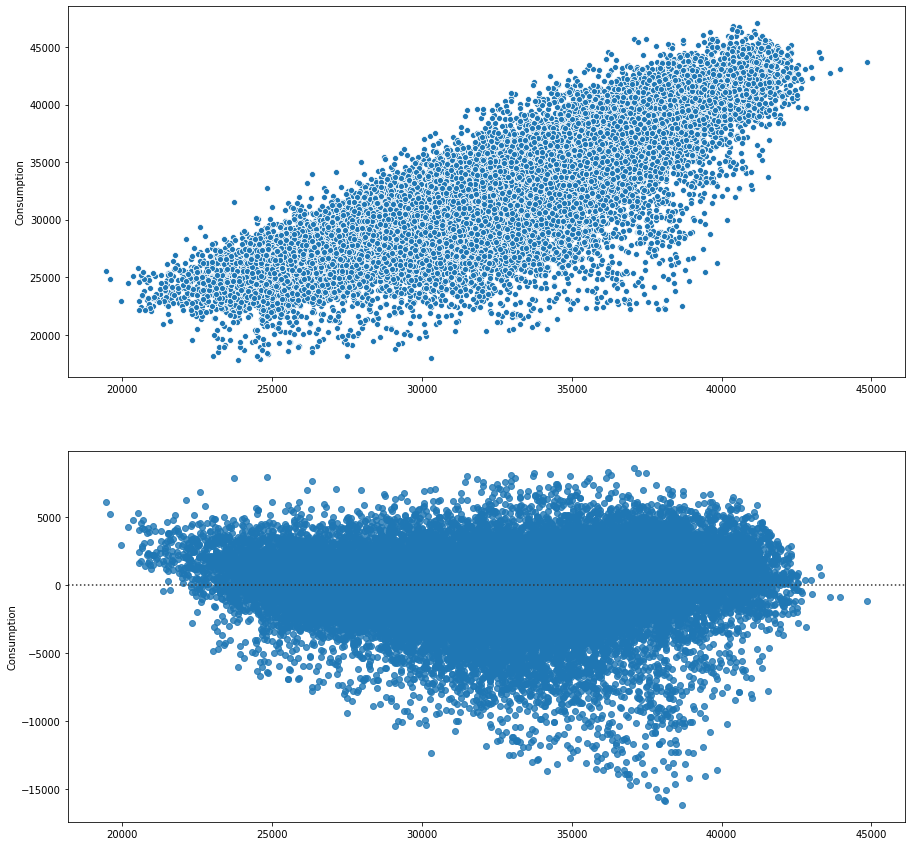

In [0]:
fig,ax=plt.subplots(nrows=2,figsize=(15,15))
preds=model.predict(train_df)
sns.scatterplot(x=preds,y=train_y,ax=ax[0])
sns.residplot(preds, train_y,ax=ax[1])

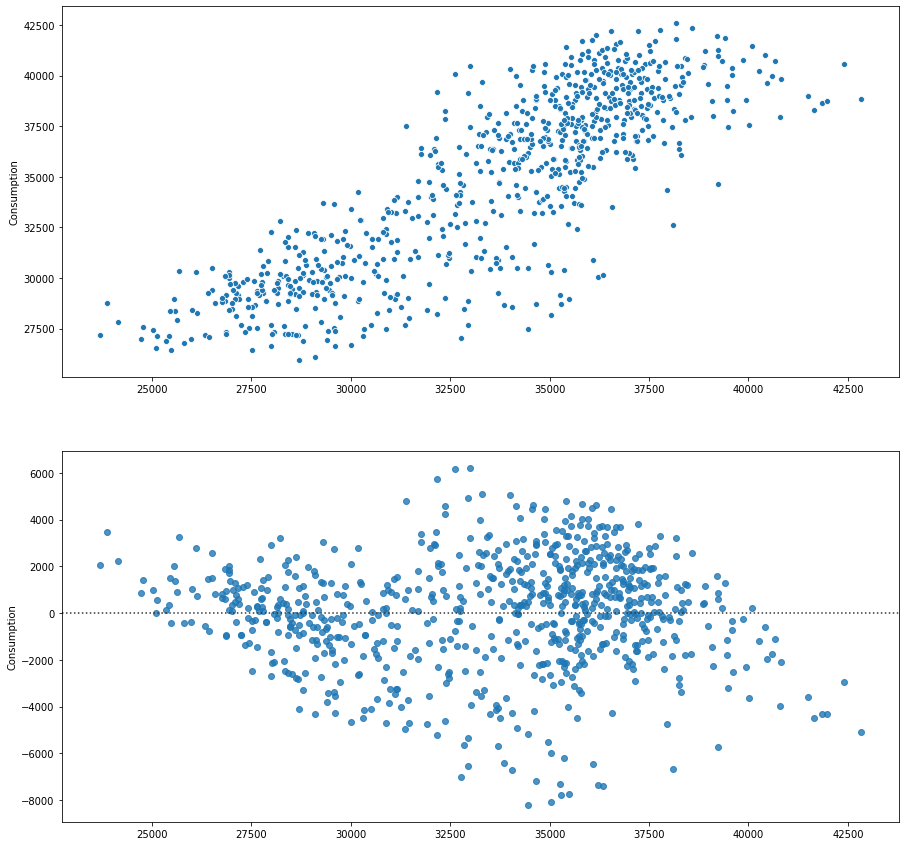

In [0]:
fig,ax=plt.subplots(nrows=2,figsize=(15,15))
preds=model.predict(valid_df)
sns.scatterplot(x=preds,y=valid_y,ax=ax[0])
sns.residplot(preds, valid_y,ax=ax[1])

# Ridge

In [0]:
from sklearn.linear_model import Ridge

model=Ridge()
model.fit(train_df,train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
pred=model.predict(valid_df)
np.sqrt(mean_squared_error(pred,valid_y.values)),np.sqrt(mean_squared_log_error(pred,valid_y.values))

(2616.623868522194, 0.07589318939424193)

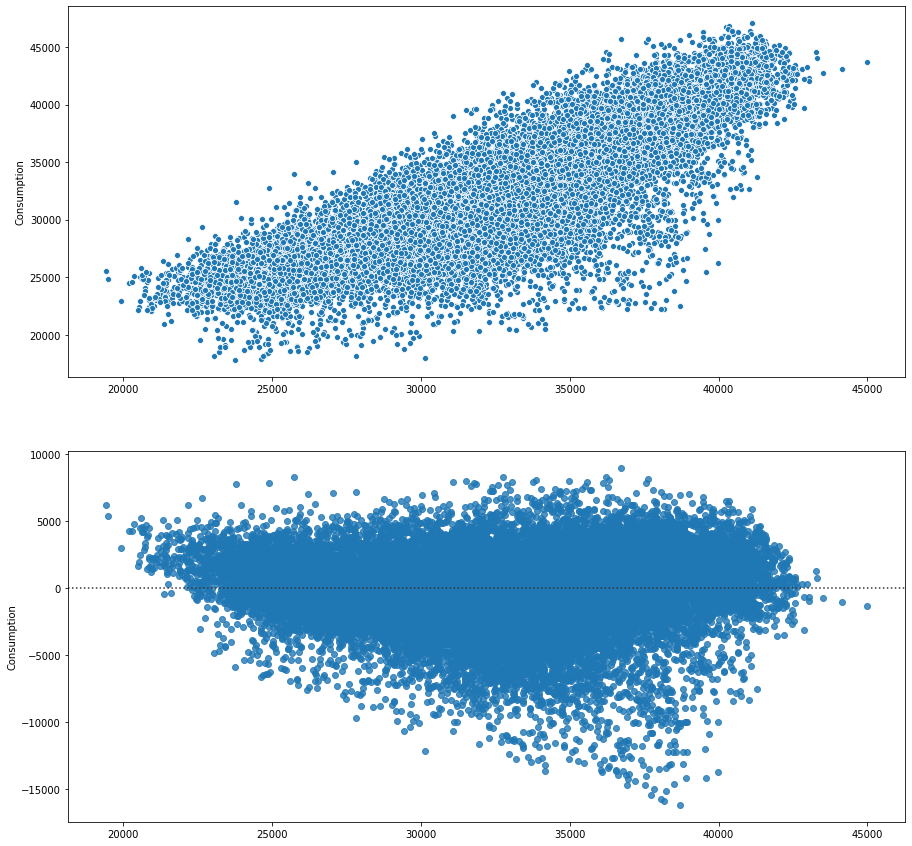

In [0]:
fig,ax=plt.subplots(nrows=2,figsize=(15,15))
preds=model.predict(train_df)
sns.scatterplot(x=preds,y=train_y,ax=ax[0])
sns.residplot(preds, train_y,ax=ax[1])

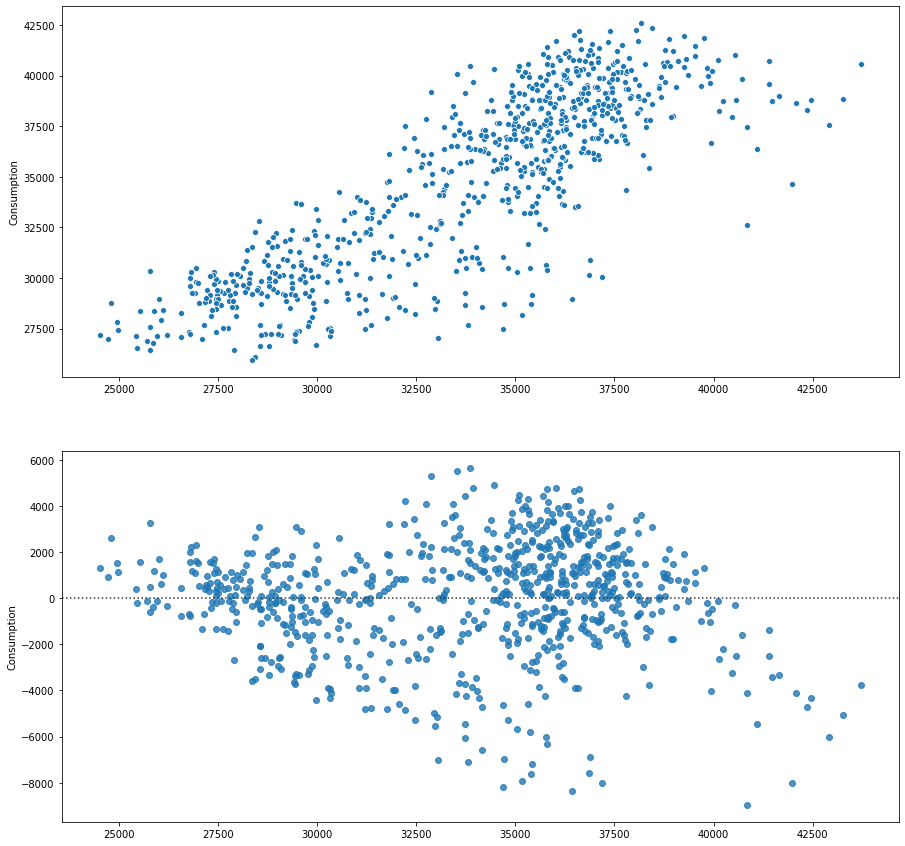

In [0]:
fig,ax=plt.subplots(nrows=2,figsize=(15,15))
preds=model.predict(valid_df)
sns.scatterplot(x=preds,y=valid_y,ax=ax[0])
sns.residplot(preds, valid_y,ax=ax[1])

# Lasso

In [0]:
from sklearn.linear_model import Lasso

model=Lasso(alpha=1)
model.fit(train_df,train_y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [0]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
pred=model.predict(valid_df)
np.sqrt(mean_squared_error(pred,valid_y.values)),np.sqrt(mean_squared_log_error(pred,valid_y.values))

(1837.4831075225643, 0.053427497505003516)

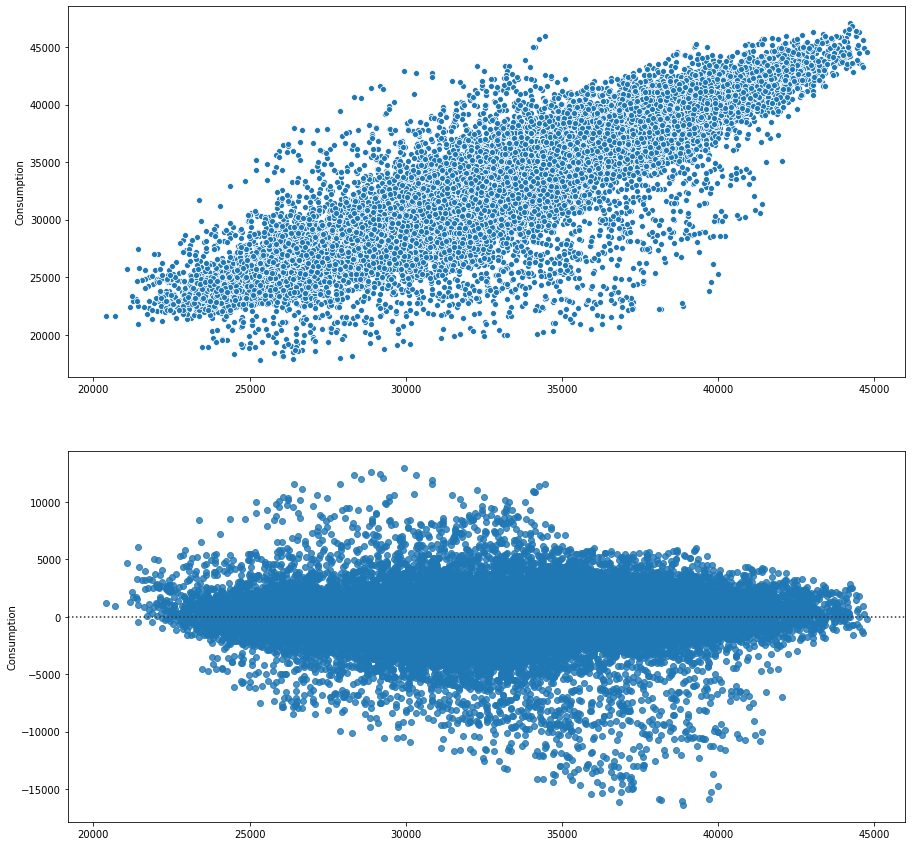

In [0]:
fig,ax=plt.subplots(nrows=2,figsize=(15,15))
preds=model.predict(train_df)
sns.scatterplot(x=preds,y=train_y,ax=ax[0])
sns.residplot(preds, train_y,ax=ax[1])

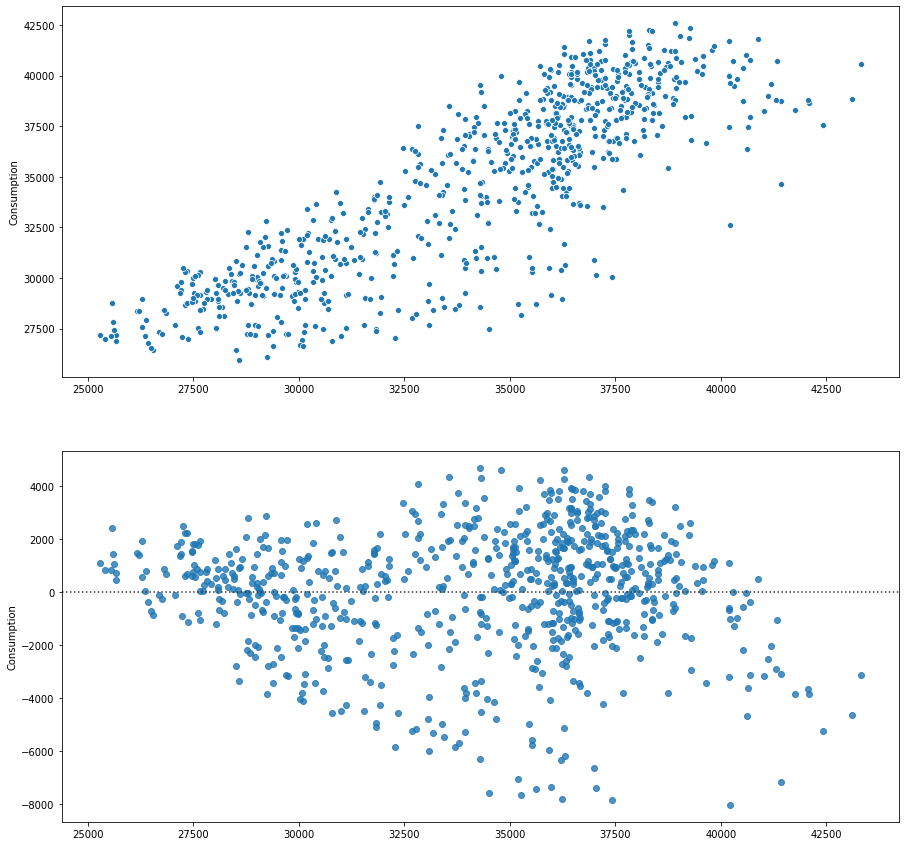

In [0]:
fig,ax=plt.subplots(nrows=2,figsize=(15,15))
preds=model.predict(valid_df)
sns.scatterplot(x=preds,y=valid_y,ax=ax[0])
sns.residplot(preds, valid_y,ax=ax[1])

# Feature selector

In [0]:
!pip install feature-selector

     |████████████████████████████████| 716kB 4.3MB/s 
     |████████████████████████████████| 12.4MB 9.4MB/s 
     |████████████████████████████████| 184kB 42.3MB/s 
     |████████████████████████████████| 11.8MB 21.9MB/s 
     |████████████████████████████████| 12.2MB 25.6MB/s 
     |████████████████████████████████| 15.0MB 25.8MB/s 
  Created wheel for seaborn: filename=seaborn-0.8.1-cp36-none-any.whl size=184833 sha256=60d47ca2f93f535cf897a2ac2fc00d6a3fca2e3ec980ccc987834a2b3b9038ae
  Stored in directory: /root/.cache/pip/wheels/26/0a/44/53ddd89769e62f7c6691976375b86c6492e7dd20a2d3970e32
Successfully built seaborn
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: xarray 0.14.1 has requirement pandas>=0.24, but you'll have pandas 0.23.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: spacy 2.1.9 has requirement nu

In [0]:
from feature_selector import FeatureSelector
fs = FeatureSelector(data = pd.DataFrame(train_df), labels = train_y)
fs.identify_zero_importance(task = 'regression', eval_metric = 'mse', 
                            n_iterations = 5, early_stopping = True)

Training Gradient Boosting Model



KeyboardInterrupt: ignored

# RFE


In [0]:
from sklearn.feature_selection import RFE

2

In [0]:
selector = RFE(model, 600, step=5)
selector = selector.fit(train_df, train_y)
selector.support_

In [0]:
selector.ranking_

5

In [0]:
np.where(selector.support_)[0]

600

In [0]:
from sklearn.linear_model import Lasso

model=Lasso()
model.fit(pd.DataFrame(train_df)[np.where(selector.support_)[0]].values,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118510545477.61392, tolerance: 85136675.81739353
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
pred=model.predict(pd.DataFrame(valid_df)[np.where(selector.support_)[0]].values)
np.sqrt(mean_squared_error(pred,valid_y.values)),np.sqrt(mean_squared_log_error(pred,valid_y.values))

(2353.6631476572534, 0.06895031042112189)

# OLS

In [0]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = load_boston()
X = pd.DataFrame(train_df.copy())
y = train_y.values.copy()


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add                             160 with p-value 0.0
Add                             203 with p-value 0.0
Add                             202 with p-value 0.0
Add                             791 with p-value 0.0
Add                             792 with p-value 0.0
Add                             204 with p-value 0.0
Add                             728 with p-value 0.0
Add                             803 with p-value 0.0
Add                             726 with p-value 2.18816e-284
Drop                            160 with p-value 0.488271


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add                             739 with p-value 5.07836e-269
Add                             740 with p-value 1.28611e-292
Add                             794 with p-value 2.24825e-277


KeyboardInterrupt: ignored

# Lag addition

In [0]:
cons_temp["two_days_lag"]=cons_temp.Consumption.shift(24*2)
cons_temp["seven_days_lag"]=cons_temp.Consumption.shift(24*7)
cons_temp.dropna(inplace=True)

###  Create validation part of the data

In [0]:
# buraya 2020nin ocagı dataya eklenip sonrası validation datası olarak kullanılacak
cons_temp=cons_temp.reset_index()
train_range=cons_temp.loc[cons_temp.Datetime < pd.to_datetime("20200120",format="%Y%m%d")].index
validation_range=cons_temp.loc[cons_temp.Datetime >= pd.to_datetime("20200120",format="%Y%m%d")].index
del cons_temp["Datetime"]
train_range

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            35870, 35871, 35872, 35873, 35874, 35875, 35876, 35877, 35878,
            35879],
           dtype='int64', length=35136)

# Drop forecasts lag and reduce dimensions

In [0]:
only_lag=["Hour","Consumption","Day","Month","Year","weekday","Season","Quarter","Hour_sin","Hour_cos","Day_sin","Day_cos","Month_sin","Month_cos","weekday_sin","weekday_cos","two_days_lag","seven_days_lag"]
#cons_temp=cons_temp[only_lag]

In [0]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(cons_temp[cons_temp.columns.difference(only_lag)])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
sum(pca.explained_variance_ratio_[:30])

0.9960548642929458

In [0]:
cons_pca=pca.transform(cons_temp[cons_temp.columns.difference(only_lag)])[:,:30]

In [0]:
cons_temp=pd.DataFrame(np.hstack([cons_temp[only_lag],cons_pca]),columns=only_lag+["pca_"+str(i) for i in range(1,31)])

# Data Prep

In [0]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

cat_features=["Hour","Day","Month","weekday","Quarter","Season"]
linear_enc=OneHotEncoder()
one_hot_encoded=linear_enc.fit_transform(cons_temp[cat_features]).toarray()
train_df=hstack([cons_temp[cons_temp.columns.difference(cat_features)].astype(float).drop(columns=["Consumption"]),one_hot_encoded])

In [0]:
valid_df=train_df.toarray()[validation_range]
valid_y=cons_temp["Consumption"][validation_range]
train_df=train_df.toarray()[train_range]
train_y=cons_temp["Consumption"][train_range]

# Linear Regression

### Training

In [0]:
train_df.shape

(35136, 106)

In [0]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(train_df,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
pred=model.predict(valid_df)
np.sqrt(mean_squared_error(pred,valid_y.values)),np.sqrt(mean_squared_log_error(pred,valid_y.values))

(1831.0446551050575, 0.05323971258223524)

In [0]:
(1855.9812806317311, 0.053833315279816364)
(1831.0446551050575, 0.05323971258223524)

In [0]:
cons_temp

,Hour,Consumption,Day,Month,Year,weekday,Season,Quarter,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos,weekday_sin,weekday_cos,two_days_lag,seven_days_lag
0,0,28763.95,7,1,2016,4,1,2016Q3,0.000000e+00,1.000000,0.988468,0.151428,0.5,8.660254e-01,-0.866025,-0.5,29244.38,29590.88
1,1,27284.84,7,1,2016,4,1,2016Q3,2.697968e-01,0.962917,0.988468,0.151428,0.5,8.660254e-01,-0.866025,-0.5,27637.23,27785.43
2,2,26321.95,7,1,2016,4,1,2016Q3,5.195840e-01,0.854419,0.988468,0.151428,0.5,8.660254e-01,-0.866025,-0.5,26335.78,26516.53
3,3,25748.49,7,1,2016,4,1,2016Q3,7.308360e-01,0.682553,0.988468,0.151428,0.5,8.660254e-01,-0.866025,-0.5,25870.23,26091.62
4,4,25636.58,7,1,2016,4,1,2016Q3,8.878852e-01,0.460065,0.988468,0.151428,0.5,8.660254e-01,-0.866025,-0.5,25975.07,25871.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35899,19,38486.43,2,3,2020,0,2,2020Q1,-8.878852e-01,0.460065,0.394356,0.918958,1.0,6.123234e-17,0.000000,1.0,37673.62,39591.24
35900,20,38103.82,2,3,2020,0,2,2020Q1,-7.308360e-01,0.682553,0.394356,0.918958,1.0,6.123234e-17,0.000000,1.0,36701.12,38806.87
35901,21,37056.92,2,3,2020,0,2,2020Q1,-5.195840e-01,0.854419,0.394356,0.918958,1.0,6.123234e-17,0.000000,1.0,35761.05,37548.92
35902,22,35678.38,2,3,2020,0,2,2020Q1,-2.697968e-01,0.962917,0.394356,0.918958,1.0,6.123234e-17,0.000000,1.0,34614.46,36354.90


# Lasso

In [0]:
from sklearn.linear_model import Lasso

model=Lasso(alpha=1)
model.fit(train_df,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85018417312.97185, tolerance: 84659571.25588389
  positive)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [0]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
pred=model.predict(train_df)
np.sqrt(mean_squared_error(pred,train_y.values)),np.sqrt(mean_squared_log_error(pred,train_y.values))

(2210.492800119699, 0.07116476630635636)

In [0]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
pred=model.predict(valid_df)
np.sqrt(mean_squared_error(pred,valid_y.values)),np.sqrt(mean_squared_log_error(pred,valid_y.values))

(1836.0093228365508, 0.05336675638735692)